# DA-NLP-2-text-classification

Part 1 and Part 2 were NLP Homework activities. You'll see the teacher gave us prompts/hints. 

We corrected Part 1 in class. I completed the analysis and made improvements in Part 2 on my own and submitted for review. 

The teacher's answers are labelled as "correct answers".

I also have notes in red to prompt me to ask questions in class or to research later.



<br>
<a name="top"></a>
Table of Contents

[Part 1: Sentiment Analysis](#part1)  
[Part 2: Multiclass](#part2)   
[Part 2 - Challenge: Analyse your results](#challenge)

<a name="part1"></a>
# Part 1: Sentiment Analysis Exercise



In [3]:
#nltk.download('wordnet')

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import re

from io import StringIO



from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

## Load data

In [18]:
def read_movie_data():
    reviews_train = []
    for line in open('./data/movie_data/full_train.txt', 'r'):
        reviews_train.append(line.strip())

    reviews_test = []
    for line in open('./data/movie_data/full_test.txt', 'r'):
        reviews_test.append(line.strip())
    
    #assigned 1 to half the data and 0 to the other half 
    target = [1 if i < 12500 else 0 for i in range(25000)]
    
    train_df = pd.DataFrame(reviews_train)
    train_df.columns = ['text']
    train_df['target'] = target
    
    test_df = pd.DataFrame(reviews_test)
    test_df.columns = ['text']
    test_df['target'] = target    
    
    return train_df, test_df

<span style="color:red">Qu #1 I don't understand the code below. </span>  
<span style="color:purple">Ans #1 The code below is CALLING the method. Like a function </span>

In [19]:
train_df, test_df = read_movie_data()

In [26]:
# if you have memory issues (taking too long to compute)
#test_df = test_df.sample(5000)
#train_df = train_df.sample(5000)

# TASK 1: Start with pre-processing text

**Pre-processing**
- Use the tokenization from nltk (word_tokenize)
- Use the 2 regex cleaning rules for your data
- Run lemmatization 
- Lower-case

<span style="color:red">Qu #2 I don't understand how to recreate what the regex code below</span>

In [27]:
REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

<span style="color:purple">Testing different preprocessing elements</span>

<span style="color:red">Qu #3 With Regex I don't know why we need word_tokenize() and i don't understand regex. So I want to research this some more.</span>  


In [28]:
#Tokenise words while ignoring punctuation
text = train_df['text'].iloc(0)[6][:500]
text

"Yes its an art... to successfully make a slow paced thriller.<br /><br />The story unfolds in nice volumes while you don't even notice it happening.<br /><br />Fine performance by Robin Williams. The sexuality angles in the film can seem unnecessary and can probably affect how much you enjoy the film. However, the core plot is very engaging. The movie doesn't rush onto you and still grips you enough to keep you wondering. The direction is good. Use of lights to achieve desired affects of suspens"

In [29]:
# implement your code here

def preprocess_reviews(text):
    # do your code
    # Tokenise words while ignoring punctuation
    text = re.sub(REPLACE_NO_SPACE, " ", text)
    text = re.sub(REPLACE_WITH_SPACE, " ", text)
    # Use the tokenization from nltk (word_tokenize)
    
    #tokeniser = RegexpTokenizer(REPLACE_NO_SPACE)
    tokens = word_tokenize(text)

    # Lowercase and lemmatise 
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]
    
    return lemmas

In [38]:
# Teacher's solution #1

def teacher_soln1(text):
    text = re.sub(REPLACE_NO_SPACE, " ", text)
    text = re.sub(REPLACE_WITH_SPACE, " ", text)

    tokens = word_tokenize(text)
    
    # Lowercase and lemmatise 
    lemmatiser = WordNetLemmatizer()
    
    lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]
    
    return lemmas

In [ ]:
# Teacher's solution #2
def teacher_soln2(text):
    text = re.sub(REPLACE_NO_SPACE, " ", text)
    text = re.sub(REPLACE_WITH_SPACE, " ", text)

    tokens = word_tokenize(text)
    
    # Lowercase and lemmatise 
    lemmatiser = WordNetLemmatizer()
    
    # Alternative for lemma and stop workds
    lemmas = []  # will save all lemmas comming form tokens that are lower-case and then run-through lemmatization
    for token in tokens:
        token = token.lower()
        lemma = lemmatiser.lemmatize(token)
        lemmas.append(lemma)
    
    return lemmas

### Example how the output should look like

In [117]:
#text = train_df['text'].iloc(0)[1][:200]

#print('before cleaning: ', text)
#print('\n')
#print('after cleaning: ', preprocess_reviews(text))

before cleaning:  Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything from going to school


after cleaning:  ['homelessness', 'or', 'houselessness', 'as', 'george', 'carlin', 'state', 'have', 'be', 'an', 'issue', 'for', 'years', 'but', 'never', 'a', 'plan', 'to', 'help', 'those', 'on', 'the', 'street', 'that', 'be', 'once', 'consider', 'human', 'who', 'do', 'everything', 'from', 'go', 'to', 'school']

### How my code looks after preprocessing

In [41]:
text = train_df['text'].iloc(0)[1][:500]
#looking at how <br /> and wouldn't are treated.
#regex w+ get's rid of apostrophes and separates over-hype
print('before cleaning: ', text)
print('\n')
print('after cleaning: ', teacher_soln1(text))

before cleaning:  Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything from going to school, work, or vote for the matter. Most people think of the homeless as just a lost cause while worrying about things such as racism, the war on Iraq, pressuring kids to succeed, technology, the elections, inflation, or worrying if they'll be next to end up on the streets.<br /><br />But what if you we


after cleaning:  ['homelessness', 'or', 'houselessness', 'as', 'george', 'carlin', 'state', 'have', 'be', 'an', 'issue', 'for', 'years', 'but', 'never', 'a', 'plan', 'to', 'help', 'those', 'on', 'the', 'street', 'that', 'be', 'once', 'consider', 'human', 'who', 'do', 'everything', 'from', 'go', 'to', 'school', 'work', 'or', 'vote', 'for', 'the', 'matter', 'most', 'people', 'think', 'of', 'the', 'homeless', 'as', 'just', 'a', 'lose', 'cause', 'while', 'worry', 'about', 'thing

----------

#### Comparing different regex results

a. tokeniser = RegexpTokenizer('\w+')  
after cleaning:  ['i', 'find', 'it', 'so', 'amaze', 'that', 'even', 'after', 'all', 'these', 'years', 'we', 'be', 'still', 'talk', 'about', 'this', 'movie', 'obviously', 'this', 'movie', 'wasn', 't', 'that', 'bad', 'or', 'else', 'people', 'wouldn', 't', 'even', 'bother', 'to', 'talk', 'about', 'it', 'i', 'personally', 'enjoy', 'this', 'film', 'immensly', 'and', 'still', 'do', 'i', 'guess', 'this', 'film', 'isn', 't', 'for', 'everyone', 'but', 'it', 'certainly', 'do', 'touch', 'the', 'hearts', 'of', 'many', 'br', 'br', 'as', 'for', 'those', 'that', 'think', 'that', 'this', 'film', 'be', 'overrate', 'or', 'over', 'hype', 'well', 'we', 'only', 'have', 'the', 'movie', 'go', 'public', 'to', 'thank', 'for', 'that', 'lol', 'you', 'see', 'it', 's', 'not', 'critics']

b. tokeniser = RegexpTokenizer('\w+|\$[\d\.]+|\S+')  
after cleaning:  ['i', 'find', 'it', 'so', 'amaze', 'that', 'even', 'after', 'all', 'these', 'years', ',', 'we', 'be', 'still', 'talk', 'about', 'this', 'movie', '!', 'obviously', 'this', 'movie', 'wasn', "'t", 'that', 'bad', 'or', 'else', 'people', 'wouldn', "'t", 'even', 'bother', 'to', 'talk', 'about', 'it', '.', 'i', 'personally', 'enjoy', 'this', 'film', 'immensly', ',', 'and', 'still', 'do', '!', 'i', 'guess', 'this', 'film', 'isn', "'t", 'for', 'everyone', ',', 'but', 'it', 'certainly', 'do', 'touch', 'the', 'hearts', 'of', 'many', '.', '<br', '/><br', '/>as', 'for', 'those', 'that', 'think', 'that', 'this', 'film', 'be', '"overrated"', 'or', '"over-hyped"...well,', 'we', 'only', 'have', 'the', 'movie', '-going', 'public', 'to', 'thank', 'for', 'that', '!', 'lol', '*', 'you', 'see', ',', 'it', "'s", 'not', 'critics', '/']

c. tokeniser = RegexpTokenizer("\w*(?:['-](?!['-])\w*)+")  
after cleaning: ["wasn't", "wouldn't", "isn't", 'over-hyped', 'movie-going', "it's"]

d. tokeniser = RegexpTokenizer("\w*(?:['-](?!['-])\w*)+|\w+")  
after cleaning:  ['i', 'find', 'it', 'so', 'amaze', 'that', 'even', 'after', 'all', 'these', 'years', 'we', 'be', 'still', 'talk', 'about', 'this', 'movie', 'obviously', 'this', 'movie', "wasn't", 'that', 'bad', 'or', 'else', 'people', "wouldn't", 'even', 'bother', 'to', 'talk', 'about', 'it', 'i', 'personally', 'enjoy', 'this', 'film', 'immensly', 'and', 'still', 'do', 'i', 'guess', 'this', 'film', "isn't", 'for', 'everyone', 'but', 'it', 'certainly', 'do', 'touch', 'the', 'hearts', 'of', 'many', 'br', 'br', 'as', 'for', 'those', 'that', 'think', 'that', 'this', 'film', 'be', 'overrate', 'or', 'over-hyped', 'well', 'we', 'only', 'have', 'the', 'movie-going', 'public', 'to', 'thank', 'for', 'that', 'lol', 'you', 'see', "it's", 'not', 'critics']

e. tokeniser = RegexpTokenizer('(<br\s*/><br\s*/>)')  
after cleaning:  ['<br /><br />']

f. #Tokenise words while ignoring punctuation
    text = re.sub(REPLACE_NO_SPACE, "", text)
    text = re.sub(REPLACE_WITH_SPACE, "", text)
    # Use the tokenization from nltk (word_tokenize)
    
    #tokeniser = RegexpTokenizer(REPLACE_NO_SPACE)
    tokens = word_tokenize(text)
    
after cleaning:  ['i', 'find', 'it', 'so', 'amaze', 'that', 'even', 'after', 'all', 'these', 'years', 'we', 'be', 'still', 'talk', 'about', 'this', 'movie', 'obviously', 'this', 'movie', 'wasnt', 'that', 'bad', 'or', 'else', 'people', 'wouldnt', 'even', 'bother', 'to', 'talk', 'about', 'it', 'i', 'personally', 'enjoy', 'this', 'film', 'immensly', 'and', 'still', 'do', 'i', 'guess', 'this', 'film', 'isnt', 'for', 'everyone', 'but', 'it', 'certainly', 'do', 'touch', 'the', 'hearts', 'of', 'many', 'as', 'for', 'those', 'that', 'think', 'that', 'this', 'film', 'be', 'overrate', 'or', 'overhypedwell', 'we', 'only', 'have', 'the', 'moviegoing', 'public', 'to', 'thank', 'for', 'that', 'lol', '*', 'you', 'see', 'its', 'not', 'critics']

-------


# Learn more...

- In the class we learned the TF-IDF Vectorizer, now learn CountVectorizer

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# Question: 

**Explain in your own words what is the difference between CountVectorizer and TfidfVectorizer**

**Answer:** Count Vectorizer creates an array indicating whether or not a set of words or ngrans are contained documents i.e. frequency of occurence whereas a TfidfVectorizer creates an array that is weighted depending on how many times the word appears in the document relative to how many words are in the document. 

cool fact -It is equivalent to CountVectorizer followed by TfidfTransformer.

# TASK 2: prepare the dataset for the model

- Clean your text using the implemented preprocess_reviews method and use the **CountVectorizer** to represent each token

In [72]:
# implement your solution here

In [42]:
train_df.shape, test_df.shape

((25000, 2), (25000, 2))

Data is already split into train and test so no need to do train, test, split.

In [43]:
train_df.head()

,text,target
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


This is just the length of the sample review we used.

In [44]:
len(preprocess_reviews(text))

89

In [34]:
#train_df['text']
vectorizer = CountVectorizer(analyzer=preprocess_reviews)
X_train = vectorizer.fit_transform(train_df.text)
X_test = vectorizer.transform(test_df.text)

In [45]:
# implement your solution here

vectoriser = CountVectorizer(analyzer=teacher_soln1) # this is the method you've implemented above
X_train = vectoriser.fit_transform(train_df.text)  # notice that you are doing the fit only for train data
X_test = vectoriser.transform(test_df.text) # represent test documents in the Vector Space we've learned with the train documents

My answer:

In [46]:
X_train.shape

(25000, 64496)

Correct Answer:

In [73]:
X_train.shape

(25000, 65270)

In [74]:
# represent test documents in the Vector Space we've learned with the train documents

# implement your solution here

My answer:

In [36]:
X_test.shape

(25000, 64496)

Correct Answer:

In [75]:
X_test.shape

(25000, 65270)

# TASK 3: predict with a Support Vector Machines classifier

More: https://scikit-learn.org/stable/modules/svm.html

“Support Vector Machine” (SVM) is a supervised machine learning algorithm that can be used for both classification or regression challenges. However, it is mostly used in classification problems.

<span style="color:red"> Qu#4. Was I supposed to get SVC(with all the parameters inside)?</span>

In [50]:
# implement your solution here

#fit the modeel using the training data
#your text info. now is structured and weighed
clf = svm.SVC()
clf.fit(X_train, train_df.target)

SVC()

In [77]:
# correct solution

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# TASK 4: See how good is your model

In [51]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, average_precision_score
y_test_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(test_df.target, y_test_pred))
print("Precision:", precision_score(test_df.target, y_test_pred, average="macro"))
print("Recall:", recall_score(test_df.target, y_test_pred, average="macro"))
print("F1:", f1_score(test_df.target, y_test_pred, average="macro"))

Accuracy: 0.86468
Precision: 0.8649328044267773
Recall: 0.86468
F1: 0.8646565604652181


In [84]:
# Correct sol'n

Accuracy: 0.86532
Precision: 0.8655640891895107
Recall: 0.8653200000000001
F1: 0.8652975145990409


# TASK 5: Wrap-up and put everything running using a pipeline

In [ ]:
#how to build a pipeline

In [ ]:
# implement your solution here

In [52]:
vectoriser = CountVectorizer(analyzer=preprocess_reviews)
clf = svm.SVC()

pipe = Pipeline([('vectoriser', vectoriser),
                 ('classifier', clf)])

pipe.fit(train_df.text, train_df.target)

Pipeline(steps=[('vectoriser',
                 CountVectorizer(analyzer=<function preprocess_reviews at 0x7f9062c92ca0>)),
                ('classifier', SVC())])

In [89]:
# Correct sol'n

Pipeline(memory=None,
         steps=[('vectoriser',
                 CountVectorizer(analyzer=<function preprocess_reviews at 0x7ff2a49689e0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, 

In [ ]:
# implement your solution here

In [54]:
y_test_pred = pipe.predict(test_df.text)

print("Accuracy:", accuracy_score(test_df.target, y_test_pred))
print("Precision:", precision_score(test_df.target, y_test_pred, average="macro"))
print("Recall:", recall_score(test_df.target, y_test_pred, average="macro"))
print("F1:", f1_score(test_df.target, y_test_pred, average="macro"))

Accuracy: 0.86468
Precision: 0.8649328044267773
Recall: 0.86468
F1: 0.8646565604652181


In [90]:
# Correct sol'n

Accuracy: 0.86532
Precision: 0.8655640891895107
Recall: 0.8653200000000001
F1: 0.8652975145990409


<a name="part2"></a>

# Part 2: Multiclass Exercise

[Go back to top](#top) 

### Load data

<span style="color:red"> Qu#5. I used the csv from https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f  
because I didn't see the file included in github. I modified the code below as follows:  
but got a different complaints_df.head()  
and it dropped different rows and had different data in the head!</span>

In [81]:
#data you will work with is a subset of the data below
df = pd.read_csv('./data/complaints/complaints.csv')
complaints_df = df[['Consumer complaint narrative', 'Product']].drop_duplicates()
complaints_df[:250000].to_csv('./data/complaints/complaints_subset.csv')

/Users/sarabernard/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
def read_complaints():
    df = pd.read_csv('./data/complaints/complaints_subset.csv')
    df = df[['Consumer complaint narrative', 'Product']]
    df.columns = ['complaint', 'product']
    
    df = df.dropna()
    
    return df    

In [7]:
complaints_df = read_complaints()

In [8]:
complaints_df.shape

(249983, 2)

correct answer  
(249983, 2)

In [9]:
complaints_df.head()

,complaint,product
2,Ive reached out to Equifax a plethora of times...,"Credit reporting, credit repair services, or o..."
4,"On XX/XX/XXXX, I made an ACH payment of {$830....",Credit card or prepaid card
6,I requested my credit report to get fraudulent...,"Credit reporting, credit repair services, or o..."
7,Back in XX/XX/XXXX I traded in my XXXX XXXX XX...,"Credit reporting, credit repair services, or o..."
8,"Commencing on or about XX/XX/2020, I fell vict...","Money transfer, virtual currency, or money ser..."


correct answer:  
 
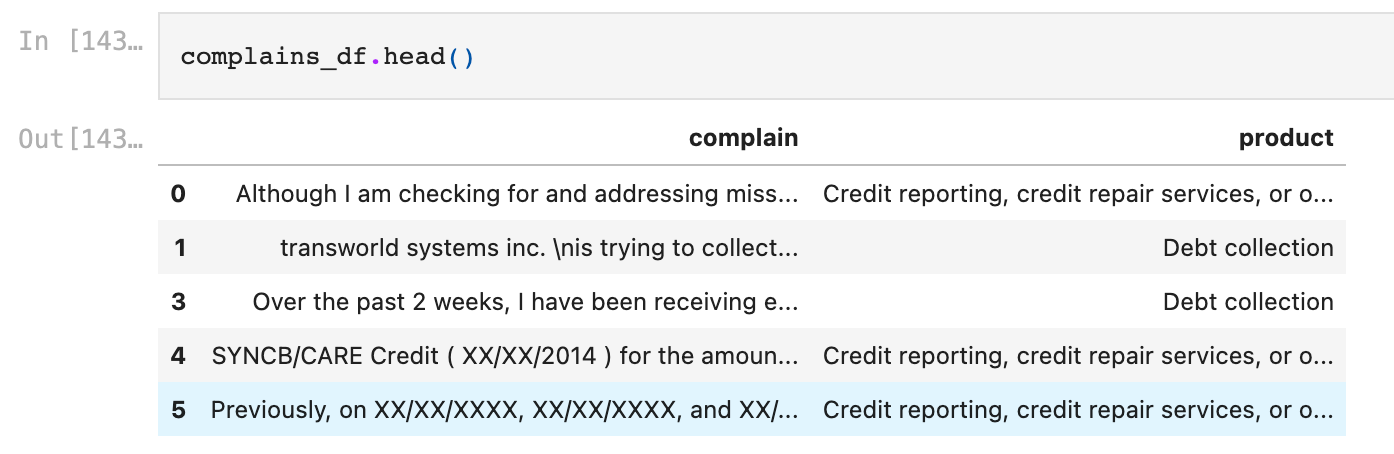

## Notice that you have an imbalanced problem

<Figure size 576x432 with 0 Axes>

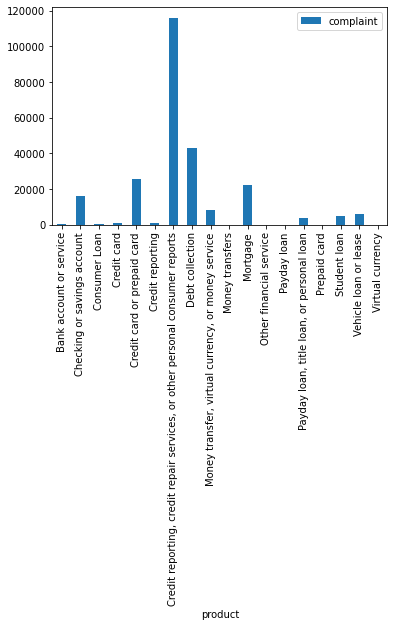

In [86]:
fig = plt.figure(figsize=(8,6))
complaints_df.groupby('product').count().plot.bar(ylim=0)
plt.show()

<Figure size 576x432 with 0 Axes>

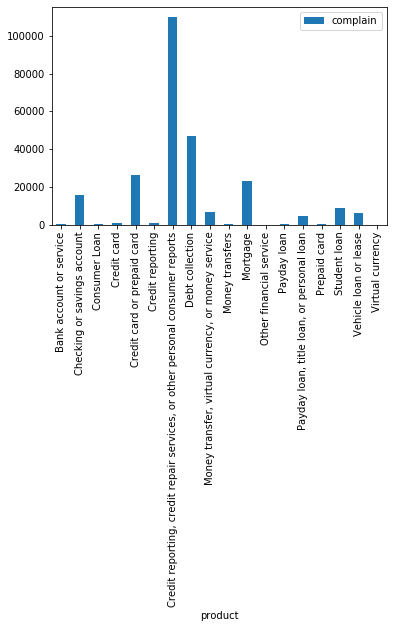

In [145]:
#correct answer
fig = plt.figure(figsize=(8,6))
complains_df.groupby('product').count().plot.bar(ylim=0)
plt.show()

# TASK 6: Pre-processing text

**Pre-processing**
- Use the RegexpTokenizer tokenizer with the regex rule r'\w+'
- Run stemming 
- Lower-case

In [87]:
# implement your code here - Copied from teacher's solution

def preprocess_complaints(text):
    # implement your solution here
  
    # Use the RegexpTokenizer tokenizer with the regex rule r'\w+'
    tokeniser = RegexpTokenizer(r'\w+')
    tokens = tokeniser.tokenize(text)
    
    # Lowercase and lemmatise 
    stemmer = SnowballStemmer("english")
    stems = [stemmer.stem(token.lower()) for token in tokens]
    
    return stems

### Example how the output should look like

In [88]:
text = complaints_df['complaint'].iloc(0)[1][:200]

print('before cleaning: ', text)
print('\n')
print('after cleaning: ', preprocess_complaints(text))

before cleaning:  On XX/XX/XXXX, I made an ACH payment of {$830.00} to my MasterCard with Bank of America. I received email confirmation of the payment on XX/XX/XXXX from Bank of America.This was for a payment due in a


after cleaning:  ['on', 'xx', 'xx', 'xxxx', 'i', 'made', 'an', 'ach', 'payment', 'of', '830', '00', 'to', 'my', 'mastercard', 'with', 'bank', 'of', 'america', 'i', 'receiv', 'email', 'confirm', 'of', 'the', 'payment', 'on', 'xx', 'xx', 'xxxx', 'from', 'bank', 'of', 'america', 'this', 'was', 'for', 'a', 'payment', 'due', 'in', 'a']


In [147]:
#correct solution
text = complains_df['complain'].iloc(0)[1][:200]

print('before cleaning: ', text)
print('\n')
print('after cleaning: ', preprocess_complains(text))

before cleaning:  transworld systems inc. 
is trying to collect a debt that is not mine, not owed and is inaccurate.


after cleaning:  ['transworld', 'system', 'inc', 'is', 'tri', 'to', 'collect', 'a', 'debt', 'that', 'is', 'not', 'mine', 'not', 'owe', 'and', 'is', 'inaccur']


# TASK 7: Split your dataset in train and test

- See in the method train_test_split class notebook
- Use random_state 0

In [89]:
# your code here
X_train, X_test, y_train, y_test = \
train_test_split(complaints_df['complaint'], complaints_df['product'], test_size=0.3, random_state=0)

# Task 8: prepare the dataset for the model

- Clean your text using the implemented preprocess_complains method and use the **TfidfVectorizer** to represent each token

In [90]:
vectoriser = TfidfVectorizer(analyzer=preprocess_complaints) # this is the method you've implemented above
X_train_tfidf = vectoriser.fit_transform(X_train)  # notice that you are doing the fit only for train data

In [91]:
X_train_tfidf.shape

(174988, 49010)

In [95]:
0.7*complaints_df.shape[0]

174988.09999999998

In [96]:
# represent test documents in the Vector Space we've learned with the train documents
X_test_tfidf = vectoriser.transform(X_test)

In [97]:
X_test_tfidf.shape  # notice the shape! why do you think is also 27,676 as we saw in the X_train_tfidf?

(74995, 49010)

# Task 9: Train a Naive Bayes classifier

Let's try Multinominal Naive Bayes [sklearn](https://scikit-learn.org/stable/modules/naive_bayes.html)

In [98]:
# Fit the model using the training data
# Your text information now is structured and weighted according to TF-IDF
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

# Task 10: See how good was your model

In [99]:
y_test_pred = nb.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average="macro"))
print("Recall:", recall_score(y_test, y_test_pred, average="macro"))
print("F1:", f1_score(y_test, y_test_pred, average="macro"))

Accuracy: 0.6761384092272819


/Users/sarabernard/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.3913282975189383
Recall: 0.18179106587670488
F1: 0.1964459617957943


## now your model is not so good...

In [100]:
confusion_matrix(y_test, y_test_pred)

array([[    0,    46,     0,     0,    52,     0,    73,     3,     1,
            0,     4,     0,     0,     0,     0,     0,     0],
       [    0,  1503,     0,     0,  1242,     0,  1899,    84,     3,
            0,    43,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,    11,     0,   113,    19,     0,
            0,     7,     0,     0,     0,     0,     0,     0],
       [    0,     2,     0,     0,   132,     0,   143,    12,     0,
            0,     1,     0,     0,     0,     0,     0,     0],
       [    0,    54,     0,     0,  3994,     0,  3574,    92,     0,
            0,    16,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     1,     0,   262,     4,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [    0,    10,     0,     0,   151,     0, 34228,   599,     0,
            0,   173,     0,     0,     0,     0,     0,     0],
       [    0,     7,     0,     0,   170,     0

/Users/sarabernard/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=['Bank account or service' 'Checking or savings account' 'Consumer Loan'
 'Credit card' 'Credit card or prepaid card' 'Credit reporting'
 'Credit reporting, credit repair services, or other personal consumer reports'
 'Debt collection' 'Money transfer, virtual currency, or money service'
 'Money transfers' 'Mortgage' 'Other financial service' 'Payday loan'
 'Payday loan, title loan, or personal loan' 'Prepaid card' 'Student loan'
 'Vehicle loan or lease' 'Virtual currency'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


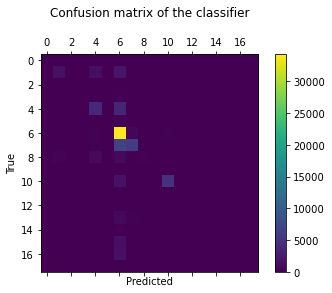

In [101]:
labels = nb.classes_
cm = confusion_matrix(y_test, y_test_pred, labels)
#print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier\n')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [106]:
labels[0]

'Bank account or service'

In [105]:
labels[10]

'Mortgage'

In [104]:
complaints_df['product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    116124
Debt collection                                                                  43079
Credit card or prepaid card                                                      25800
Mortgage                                                                         22332
Checking or savings account                                                      16231
Money transfer, virtual currency, or money service                                8253
Vehicle loan or lease                                                             6018
Student loan                                                                      5211
Payday loan, title loan, or personal loan                                         3822
Credit card                                                                        906
Credit reporting                                                                   823
Bank account or service                    

In [113]:
116124/complaints_df.shape[0], 43079/complaints_df.shape[0], 25800/complaints_df.shape[0]

(0.4645275878759756, 0.17232771828484336, 0.10320701807722925)

<a name="challenge">

[Go back to top](#top) 

## My analysis and way forward

1. 46% of the data falls into 1 category. 
    - So we should ignore a few (or lump together a few of the smaller categories)
2. there is overlap in some of the categories.
    - Action lump some of the categories.

### Merge columns

In [21]:
complaints_df.head()

,complaint,product
2,Ive reached out to Equifax a plethora of times...,"Credit reporting, credit repair services, or o..."
4,"On XX/XX/XXXX, I made an ACH payment of {$830....",Credit card or prepaid card
6,I requested my credit report to get fraudulent...,"Credit reporting, credit repair services, or o..."
7,Back in XX/XX/XXXX I traded in my XXXX XXXX XX...,"Credit reporting, credit repair services, or o..."
8,"Commencing on or about XX/XX/2020, I fell vict...","Money transfer, virtual currency, or money ser..."


In [19]:
complaints_df['product']

2         Credit reporting, credit repair services, or o...
4                               Credit card or prepaid card
6         Credit reporting, credit repair services, or o...
7         Credit reporting, credit repair services, or o...
8         Money transfer, virtual currency, or money ser...
                                ...                        
249995                                             Mortgage
249996                                      Debt collection
249997                                         Student loan
249998    Credit reporting, credit repair services, or o...
249999                          Credit card or prepaid card
Name: product, Length: 249983, dtype: object

#### I couldn't get the OR statements below to work! So very inefficient.

In [72]:

#complaints_df.insert(1, 'products','')
complaints_df.loc[complaints_df['product']=='Credit reporting, credit repair services, or other personal consumer reports','products']='reports'
complaints_df.loc[complaints_df['product']=='Credit reporting','products']='reports'


complaints_df.loc[complaints_df['product']=='Debt collection','products']='debt' 

complaints_df.loc[complaints_df['product']=='Credit card or prepaid card','products']='credit or debit card'
complaints_df.loc[complaints_df['product']=='Credit card','products']='credit or debit card'
complaints_df.loc[complaints_df['product']=='Prepaid card','products']='credit or debit card'

complaints_df.loc[complaints_df['product']=='Mortgage','products']='mortgage'

complaints_df.loc[complaints_df['product']=='Checking or savings account','products']='financial services'
complaints_df.loc[complaints_df['product']=='Money transfer, virtual currency, or money service','products']='financial services'
complaints_df.loc[complaints_df['product']=='Bank account or service','products']='financial services'
complaints_df.loc[complaints_df['product']=='Money transfers','products']='financial services'
complaints_df.loc[complaints_df['product']=='Other financial service','products']='financial services'
complaints_df.loc[complaints_df['product']=='Virtual currency','products']='financial services'

complaints_df.loc[complaints_df['product']=='Vehicle loan or lease','products']='loans'
complaints_df.loc[complaints_df['product']=='Student loan','products']='loans'
complaints_df.loc[complaints_df['product']=='Payday loan, title loan, or personal loan','products']='loans'
complaints_df.loc[complaints_df['product']=='Consumer Loan','products']='loans'
complaints_df.loc[complaints_df['product']=='Payday loan','products']='loans'
complaints_df.drop(['product'], axis=1,inplace=True) 

                                                                      

In [73]:
complaints_df.head()

,complaint,products
2,Ive reached out to Equifax a plethora of times...,reports
4,"On XX/XX/XXXX, I made an ACH payment of {$830....",credit or debit card
6,I requested my credit report to get fraudulent...,reports
7,Back in XX/XX/XXXX I traded in my XXXX XXXX XX...,reports
8,"Commencing on or about XX/XX/2020, I fell vict...",financial services


In [85]:
complaints_df['products'].value_counts()

reports                 116947
debt                     43079
credit or debit card     26767
financial services       25159
mortgage                 22332
loans                    15699
Name: products, dtype: int64

<Figure size 576x432 with 0 Axes>

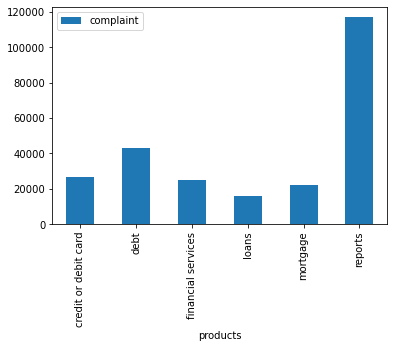

In [105]:
fig = plt.figure(figsize=(8,6))
complaints_df.groupby('products').count().plot.bar(ylim=0)
plt.show()

## I repeated the analysis

#### Step 1 - Preprocessing

In [76]:
def preprocess_complaints(text):
    # implement your solution here
  
    # Use the RegexpTokenizer tokenizer with the regex rule r'\w+'
    tokeniser = RegexpTokenizer(r'\w+')
    tokens = tokeniser.tokenize(text)
    
    # Lowercase and lemmatise 
    stemmer = SnowballStemmer("english")
    stems = [stemmer.stem(token.lower()) for token in tokens]
    
    return stems

#### Step 2 - Split your dataset in train and test

In [74]:
X_train, X_test, y_train, y_test = \
train_test_split(complaints_df['complaint'], complaints_df['products'], test_size=0.3, random_state=0)

#### Step 3 - Prepare the dataset

In [77]:
vectoriser = TfidfVectorizer(analyzer=preprocess_complaints) # this is the method you've implemented above
X_train_tfidf = vectoriser.fit_transform(X_train)  # notice that you are doing the fit only for train data

In [80]:
X_test_tfidf = vectoriser.transform(X_test)

#### Step 4 - Train a Naive Bayes classifier

In [78]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

#### Step 5 - Analyze your model (Performace Testing)

In [103]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, average_precision_score
y_test_pred = nb.predict(X_test_tfidf)

print("          Macro","Micro")
print("Accuracy:", "%.2f" % accuracy_score(y_test, y_test_pred),"%.2f" % accuracy_score(y_test, y_test_pred))
print("Precision:", "%.2f" % precision_score(y_test, y_test_pred, average="macro"), "%.2f" % precision_score(y_test, y_test_pred, average="micro"))
print("Recall:", "%.2f" %recall_score(y_test, y_test_pred, average="macro"), "%.2f" %recall_score(y_test, y_test_pred, average="micro"))
print("F1:", "%.2f" % f1_score(y_test, y_test_pred, average="macro"), "%.2f" % f1_score(y_test, y_test_pred, average="micro"))

          Macro Micro
Accuracy: 0.74 0.74
Precision: 0.84 0.74
Recall: 0.59 0.74
F1: 0.65 0.74


In [83]:
confusion_matrix(y_test, y_test_pred)

array([[ 3915,    87,   560,     1,    15,  3462],
       [  157,  5837,    72,    18,    93,  6663],
       [  466,    64,  5400,     1,    31,  1428],
       [  112,   308,    94,   820,   142,  3141],
       [   34,    69,    61,     1,  4810,  1705],
       [  161,   588,    55,    22,   170, 34432]])

/Users/sarabernard/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=['credit or debit card' 'debt' 'financial services' 'loans' 'mortgage'
 'reports'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[[ 3915    87   560     1    15  3462]
 [  157  5837    72    18    93  6663]
 [  466    64  5400     1    31  1428]
 [  112   308    94   820   142  3141]
 [   34    69    61     1  4810  1705]
 [  161   588    55    22   170 34432]]


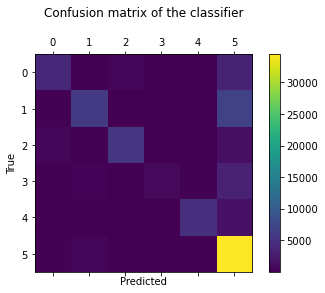

In [90]:
labels = nb.classes_
cm = confusion_matrix(y_test, y_test_pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier\n')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [106]:
labels[:]

array(['credit or debit card', 'debt', 'financial services', 'loans',
       'mortgage', 'reports'], dtype='<U20')

### My final analysis:
A lot of features are being incorrectly interpreted as **reports** by the algorithm because it was the largest group.
What is next step to resolve this?
- create 2 groups only reports vs non-reports
- improve/adjust weighting?